#  Random Forest Assisted Suggestions for Salifort Motors Employee Retention: Plan, Analyze, Construct and Execute

# **PACE Stages**

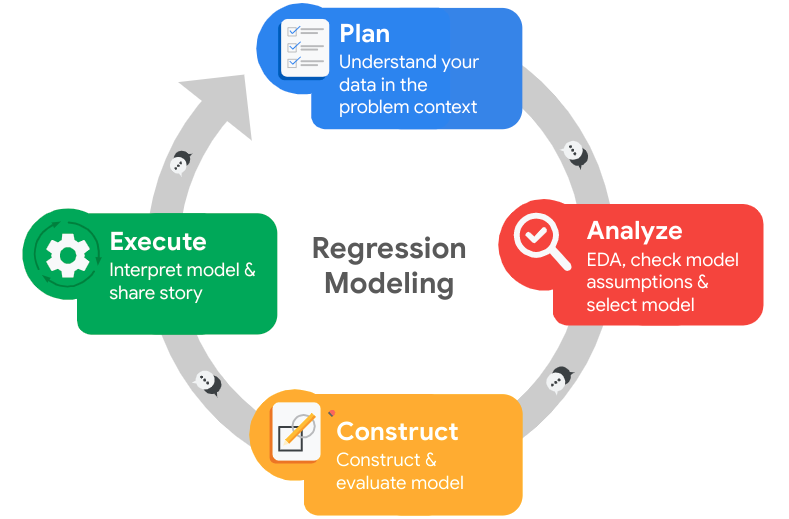

## Plan Stage

### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees. They have the following question: what’s likely to make the employee leave the company?

The project goals are to analyzing the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

Predicting that employees likely to quit help to identify factors that contribute to their leaving. Since finding, interviewing, and hiring new employees are time-consuming and expensive, increasing employee retention will be beneficial to the company.

### Familiarizing with the dataset 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Importing packages

In [1]:
# Packages for operations
import numpy as np
import pandas as pd
# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Packages for statistical analysis
from scipy import stats
#Packages for regression analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression

# Packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier, plot_importance
from xgboost import plot_importance

import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

# For saving the model
import pickle

**!!!Warning:** If you encounter problem of importing xgboost, run the following code first!

import sys
!{sys.executable} -m pip install xgboost

### Loading the dataset

In [2]:
df = pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Standardize the column names so that they are all in snake_case
# Correct any column names that are misspelled
# Make column names more concise as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Checking for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Checking for duplicates
df.duplicated().sum()

3008

In [9]:
# Examining some rows containing duplicates as needed
df[df.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


*With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. It will be proceeded by dropping them.*

In [10]:
df_1 = df.drop_duplicates(keep = 'first')
df_1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking outliers

*Particular models are more sensitive to outliers than others. In model building stage, consider removing these outliers if selected model requires it.*

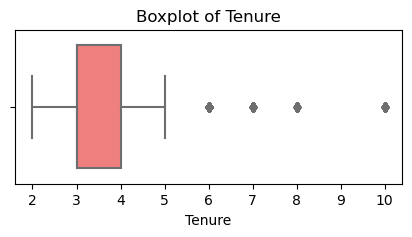

In [11]:
# Boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize = (5,2))
sns.boxplot(data = df_1, x = 'tenure', color = 'lightcoral', saturation = 1)
plt.title('Boxplot of Tenure')
plt.xlabel('Tenure')
plt.show()

In [12]:
# Calculating number of rows w/ outliers
Q1 = df_1['tenure'].quantile(0.25)
Q3 = df_1['tenure'].quantile(0.75) 
IQR = Q3-Q1

upper_threshold = Q3 + 1.5 * IQR
lower_threshold = Q1 - 1.5 * IQR
print("Lower Threshold:", lower_threshold)
print("Upper Threshold:", upper_threshold)

tenure_outliers = df_1[(df_1['tenure'] > upper_threshold) | 
                       (df_1['tenure'] < lower_threshold)]

print('Number of rows with outliers in "tenure column":', len(tenure_outliers))

Lower Threshold: 1.5
Upper Threshold: 5.5
Number of rows with outliers in "tenure column": 824


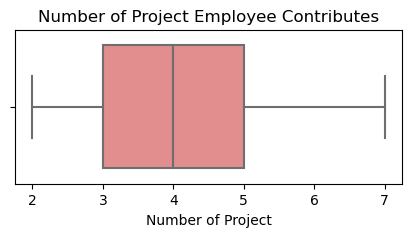

In [13]:
plt.figure(figsize = (5,2))
sns.boxplot(data = df_1, x = 'number_project', 
            color = 'lightcoral', saturation = 0.75)
plt.title('Number of Project Employee Contributes')
plt.xlabel('Number of Project')
plt.show()

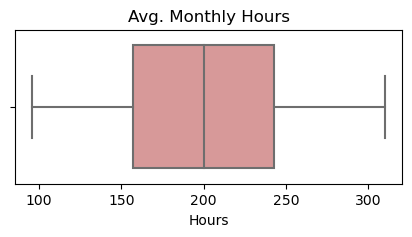

In [14]:
plt.figure(figsize = (5,2))
sns.boxplot(data = df_1, x = 'average_monthly_hours', 
            color = 'lightcoral', saturation = 0.55)
plt.title('Avg. Monthly Hours')
plt.xlabel('Hours')
plt.show()

# Analyze Stage

In [15]:
print(df_1['left'].value_counts())
print('')
print(df_1['left'].value_counts(normalize = True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations (Creating plots to visualize relationships among variables)

In [16]:
df_1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [17]:
pd.DataFrame(df_1['department'].value_counts(normalize = True)*100).rename(
    columns = {'department': 'Department %'})

,proportion
department,
sales,27.011926
technical,18.714036
support,15.186390
IT,8.139438
RandD,5.787674
product_mng,5.720957
marketing,5.612543
accounting,5.178884
hr,5.012092


In [18]:
pd.DataFrame(df_1.groupby(by = ['department'])['left'].value_counts(
    normalize = True)*100).rename(columns = {'proportion': 'Percentage (%)'})

Percentage (%)
department  left                
IT          0          83.811475
            1          16.188525
RandD       0          87.752161
            1          12.247839
accounting  0          82.447665
            1          17.552335
hr          0          81.198003
            1          18.801997
management  0          88.073394
            1          11.926606
marketing   0          83.358098
            1          16.641902
product_mng 0          83.965015
            1          16.034985
sales       0          83.019450
            1          16.980550
support     0          82.866557
            1          17.133443
technical   0          82.620321
            1          17.379679

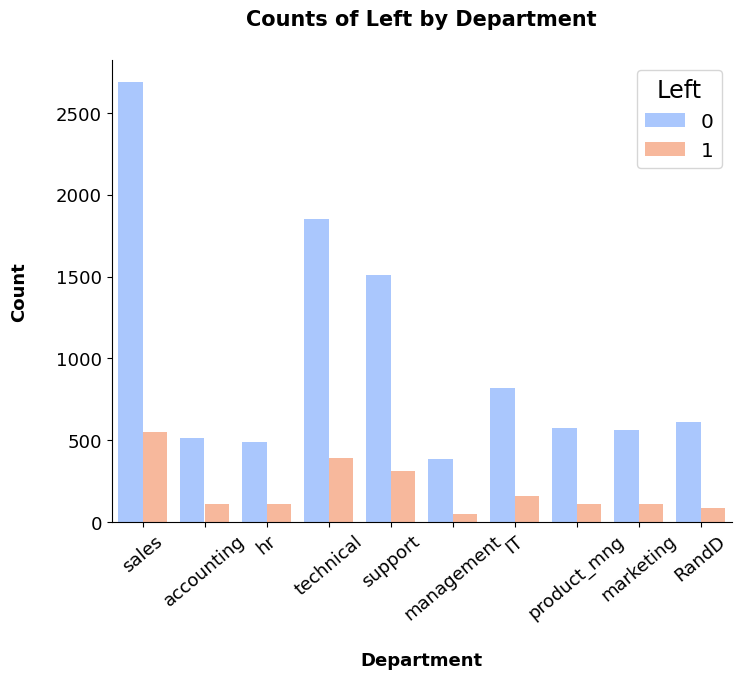

In [19]:
plt.figure(figsize = (8,6))
sns.countplot(data = df_1, x = 'department', hue = 'left',
              palette = 'coolwarm', saturation = 1)
plt.title('Counts of Left by Department', fontsize = 15, fontweight = 'bold', pad = 25)
plt.xlabel('Department', fontsize = 13, fontweight = 'bold', labelpad = 20)
plt.ylabel('Count', fontsize = 13, fontweight = 'bold', labelpad = 20)
plt.xticks(rotation = 40, size = 13)
plt.yticks(rotation = 0, size = 13)
plt.legend(title = 'Left', bbox_to_anchor = (1.00, 1), loc = 'upper right',
            fontsize = 'x-large', markerscale = 2, title_fontsize = 'xx-large')

sns.despine()
plt.savefig("Distribution-of-Left-Employee-byDepartment.png", dpi = 300, bbox_inches = 'tight')
plt.show()

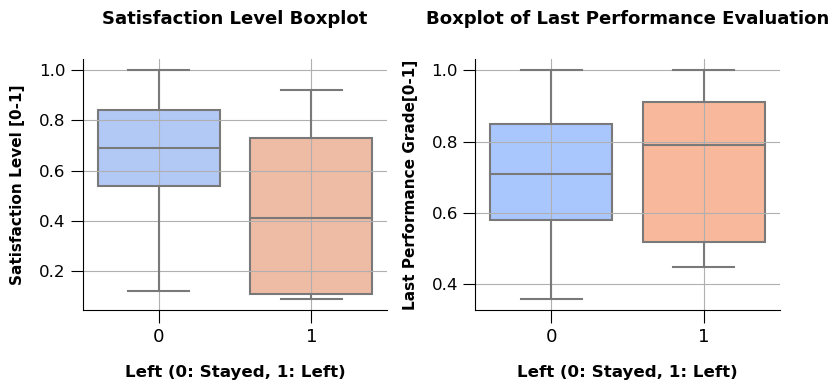

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(data = df_1, x = 'left', y = 'satisfaction_level',
            palette = 'coolwarm', saturation = 0.8, ax = ax[0])
ax[0].set_title('Satisfaction Level Boxplot', 
                fontsize = 13, fontweight = 'bold', pad = 25)
ax[0].set_xlabel('Left (0: Stayed, 1: Left)',  fontsize = 12, 
                 fontweight = 'bold', labelpad = 14)
ax[0].set_ylabel('Satisfaction Level [0-1]', fontsize = 11, 
                 fontweight = 'bold', labelpad = 10)
ax[0].tick_params(axis = 'x',  size = 9, labelsize = 13, rotation = 0)
ax[0].tick_params(axis = 'y',  size = 9, labelsize = 12, rotation = 0)
ax[0].grid()

sns.boxplot(data = df_1, x = 'left', y = 'last_evaluation', 
            palette = 'coolwarm', saturation = 1, ax = ax[1])
ax[1].set_title('Boxplot of Last Performance Evaluation', 
                fontsize = 13, fontweight = 'bold', pad = 25)
ax[1].set_xlabel('Left (0: Stayed, 1: Left)',  fontsize = 12, 
                 fontweight = 'bold', labelpad = 14)
ax[1].set_ylabel('Last Performance Grade[0-1]', fontsize = 11, 
                 fontweight = 'bold', labelpad = 10)
ax[1].tick_params(axis = 'x',  size = 9, labelsize = 13, rotation = 0)
ax[1].tick_params(axis = 'y',  size = 9, labelsize = 12, rotation = 0)
ax[1].grid()

fig.tight_layout()
sns.despine()
plt.savefig("Satistaction-Level-and-Performance-Evaluation-Boxplots.png", dpi = 300, bbox_inches = 'tight')
plt.show()

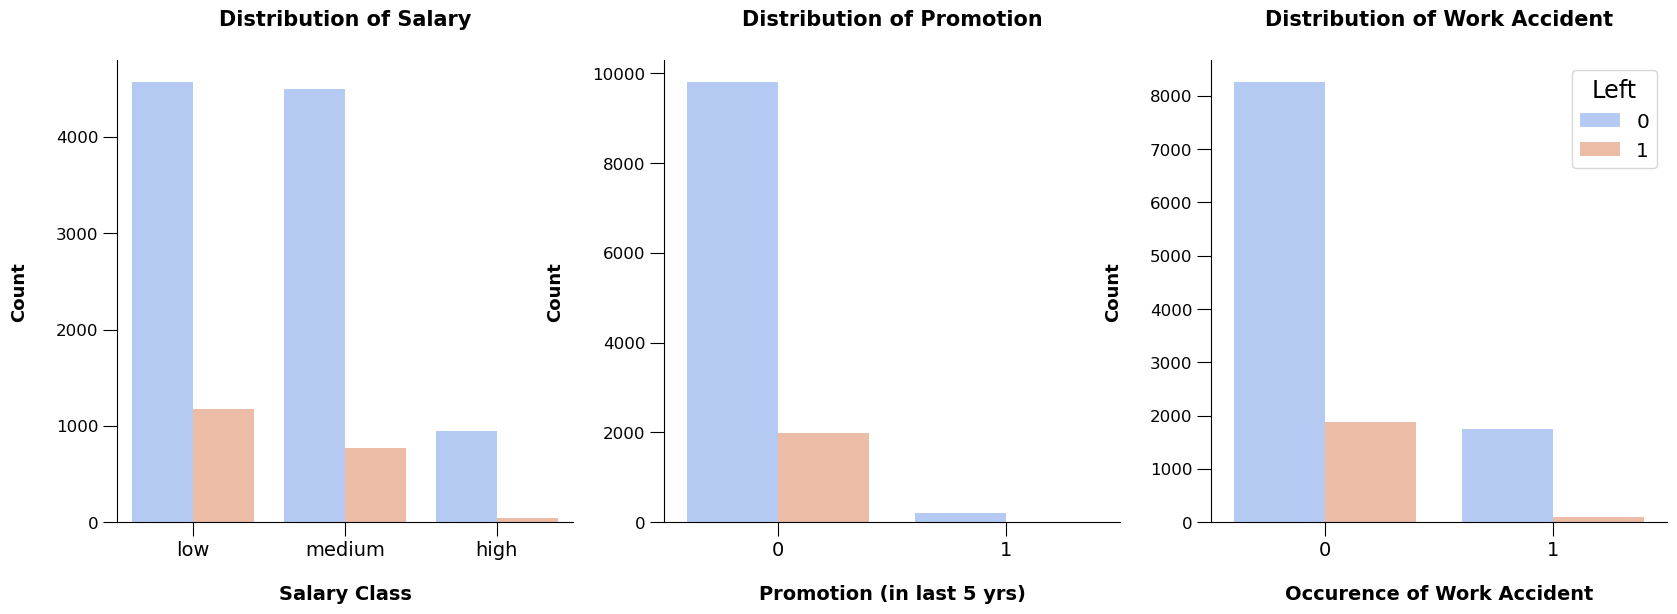

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (20,6))

sns.countplot(data = df_1, x = 'salary', hue = 'left', palette = 'coolwarm', ax = ax[0])
ax[0].set_title('Distribution of Salary', fontsize = 15, fontweight = 'bold', pad = 25)
ax[0].set_xlabel('Salary Class', fontsize = 14, fontweight = 'bold', labelpad = 18)
ax[0].set_ylabel('Count', fontsize = 13, fontweight = 'bold', labelpad = 20)
ax[0].tick_params(axis = 'x',  size = 10, labelsize = 14, rotation = 0)
ax[0].tick_params(axis = 'y',  size = 10, labelsize = 12, rotation = 0)
ax[0].legend('', frameon = False)

sns.countplot(data = df_1, x = 'promotion_last_5years', hue = 'left', 
              palette = 'coolwarm', ax = ax[1])
ax[1].set_title('Distribution of Promotion', 
                fontsize = 15, fontweight = 'bold', pad = 25)
ax[1].set_xlabel('Promotion (in last 5 yrs)', 
                 fontsize = 14, fontweight = 'bold', labelpad = 18)
ax[1].set_ylabel('Count', fontsize = 13, fontweight = 'bold', labelpad = 20)
ax[1].tick_params(axis = 'x',  size = 10, labelsize = 14, rotation = 0)
ax[1].tick_params(axis = 'y',  size = 10, labelsize = 12, rotation = 0)
ax[1].legend('', frameon = False)


sns.countplot(data = df_1, x = 'work_accident', hue = 'left', 
              palette = 'coolwarm', ax = ax[2])
ax[2].set_title('Distribution of Work Accident', 
                fontsize = 15, fontweight = 'bold', pad = 25)
ax[2].set_xlabel('Occurence of Work Accident', 
                 fontsize = 14, fontweight = 'bold', labelpad = 18)
ax[2].set_ylabel('Count', fontsize = 13, fontweight = 'bold', labelpad = 20)
ax[2].tick_params(axis = 'x',  size = 10, labelsize = 14, rotation = 0)
ax[2].tick_params(axis = 'y',  size = 10, labelsize = 12, rotation = 0)
ax[2].legend(title = 'Left', bbox_to_anchor = (1.00, 1), loc = 'upper right',
            fontsize = 'x-large', markerscale = 2, title_fontsize = 'xx-large')

sns.despine()
plt.savefig("Distributions-of-Salary-Promotion-WorkAccident.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
- Salary can be important criteria for employee's decision on leave.
- Peculiarly, very few people seem to be promoted in last 5 years.
- Work accident occurency is moderate. It does not seem to affect employee retention.

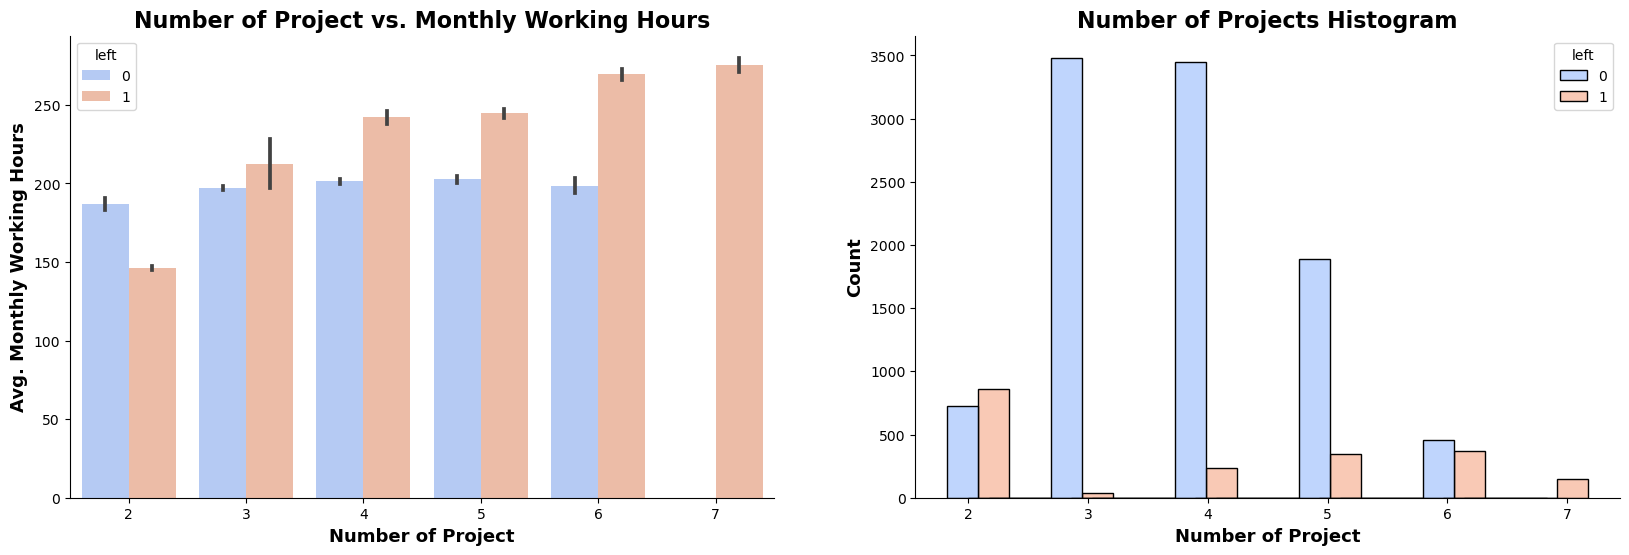

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (20,6))
sns.barplot(x = 'number_project', y = 'average_monthly_hours', hue = 'left', ax = ax[0], 
            data = df_1, palette = 'coolwarm')
ax[0].set_xlabel('Number of Project', fontsize = 13, fontweight = 'bold')
ax[0].set_ylabel('Avg. Monthly Working Hours', fontsize = 13, fontweight = 'bold')
ax[0].set_title('Number of Project vs. Monthly Working Hours', 
                fontsize = 16, fontweight = 'bold')


sns.histplot(data = df_1, x = 'number_project', hue = 'left', stat = 'count', shrink = 3,
             multiple = 'dodge', palette = 'coolwarm', ax = ax[1])
ax[1].set_xlabel('Number of Project', fontsize = 13, fontweight = 'bold')
ax[1].set_ylabel('Count', fontsize = 13, fontweight = 'bold')
ax[1].set_title('Number of Projects Histogram', fontsize='16', fontweight = 'bold')

sns.despine()
plt.savefig("Number-of-Project-feature-graphs.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [23]:
df_1[df_1['number_project']==7]['left'].value_counts()

# This confirms that all employees with 7 projects did leave.

left
1    145
Name: count, dtype: int64

**Remarks:**

It is expected that people who work on more projects would also work longer hours. ***Graphs above verifies the case that mean working hours increases with number of projects worked***.

There are two groups of employees who left the company: 
1) those who worked considerably less than their collegues with the same number of projects 
2) those who worked much more
- For 1st group, it’s possible that they were fired. 
Also, this group might include employees who had already given their notice and were assigned fewer hours. 
- For 2nd group, it’s possible that they probably quit. Employees in 2nd group likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

***Everyone with seven projects left the company, and avg. working hours of this group and those who left with six projects were noticeably higher than any other group.***

The optimal number of projects for employees to work on is 3. The ratio of left/stayed is very small for this group.

Assuming 40 hours for week and two weeks of vacation per year, then the avg. working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. 
Therefore, ***except employees who worked on 2 projects, every group(even those who didn’t leave) worked considerably more hours than average working hours/mon(166.67).***

**It indicates that employees in the company are overworked.**

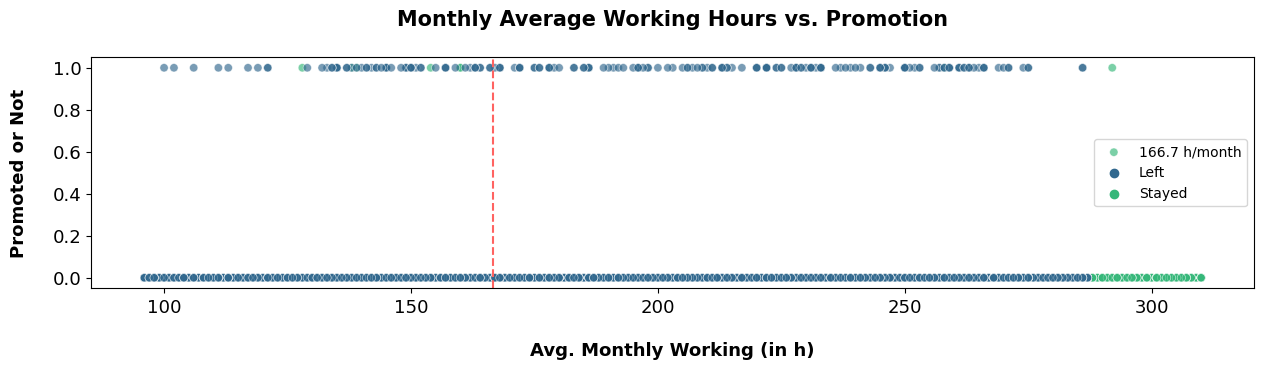

In [24]:
plt.figure(figsize = (15, 3))
sns.scatterplot(data = df_1, x = 'average_monthly_hours', y = 'promotion_last_5years',
               hue = 'left', alpha = 0.65, palette = 'viridis')
plt.axvline(x = 166.7, color = '#ff6361', ls = '--')
plt.legend(labels = ['166.7 h/month', 'Left', 'Stayed'])
plt.title('Monthly Average Working Hours vs. Promotion', 
          fontsize = 15, fontweight = 'bold', pad = 23)
plt.xlabel('Avg. Monthly Working (in h)', 
           fontsize = 13, fontweight = 'bold', labelpad = 18)
plt.ylabel('Promoted or Not', fontsize = 13, fontweight = 'bold', labelpad = 18)
plt.xticks(rotation = 0, size = 13)
plt.yticks(rotation = 0, size = 13)

plt.savefig("Monthly-Working-Hours-vs-Promotion.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
The graph above shows that very few employees who were promoted in the last 5 years. 
In spite of working very long hours, few of those employees were promoted. 

**All of the employees who left the company were working the longest hours.**


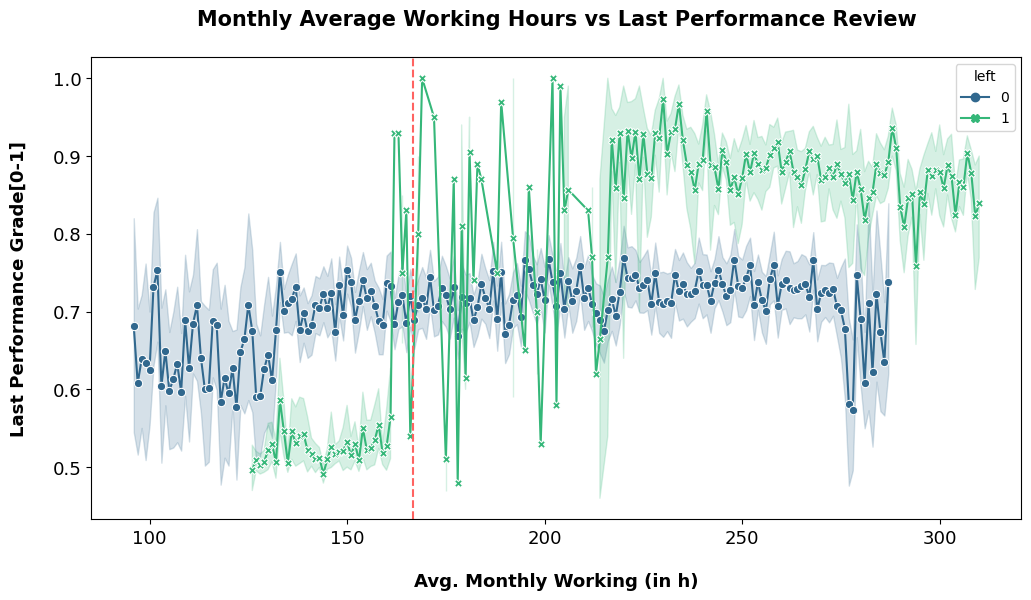

In [25]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_1, x = 'average_monthly_hours', y = 'last_evaluation', 
             hue = 'left', style = 'left', palette='viridis', 
             markers = True, dashes = False)

plt.title('Monthly Average Working Hours vs Last Performance Review', 
          fontsize = 15, fontweight = 'bold', pad = 23)
plt.xlabel('Avg. Monthly Working (in h)', 
           fontsize = 13, fontweight = 'bold', labelpad = 18)
plt.ylabel('Last Performance Grade[0-1]', 
           fontsize = 13, fontweight = 'bold', labelpad = 18)
plt.xticks(rotation = 0, size = 13)
plt.yticks(rotation = 0, size = 13)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67 h/mon', ls = '--')

plt.savefig("Monthly-Working-Hours-vs-Last-Performance-Review.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

The line graph demonstrates 2 groups of employees who left: *overworked employees who performed very well* and *employees who worked slightly under nominal monthly avg. 166.67 working hours(red dashed line) with lower evaluation scores.*  

There might be correlation between hours worked and performance evaluation score. 
Neverthless, working long hours doesn’t guarantee good performance review. 

In [26]:
pd.DataFrame(df_1['promotion_last_5years'].value_counts(normalize = True)).rename(
    columns = {'promotion_last_5years': 
               'Promotion % (in last 5 yrs)'})

,proportion
promotion_last_5years,
0,0.983071
1,0.016929


In [27]:
print(df_1.groupby(['left'])['last_evaluation'].agg([np.mean,np.median]))
print(' ')
print(df_1.groupby(['promotion_last_5years'])['last_evaluation'].agg([np.mean,np.median]))

          mean  median
left                  
0     0.715667    0.71
1     0.721783    0.79
 
                           mean  median
promotion_last_5years                  
0                      0.716842    0.72
1                      0.707438    0.71


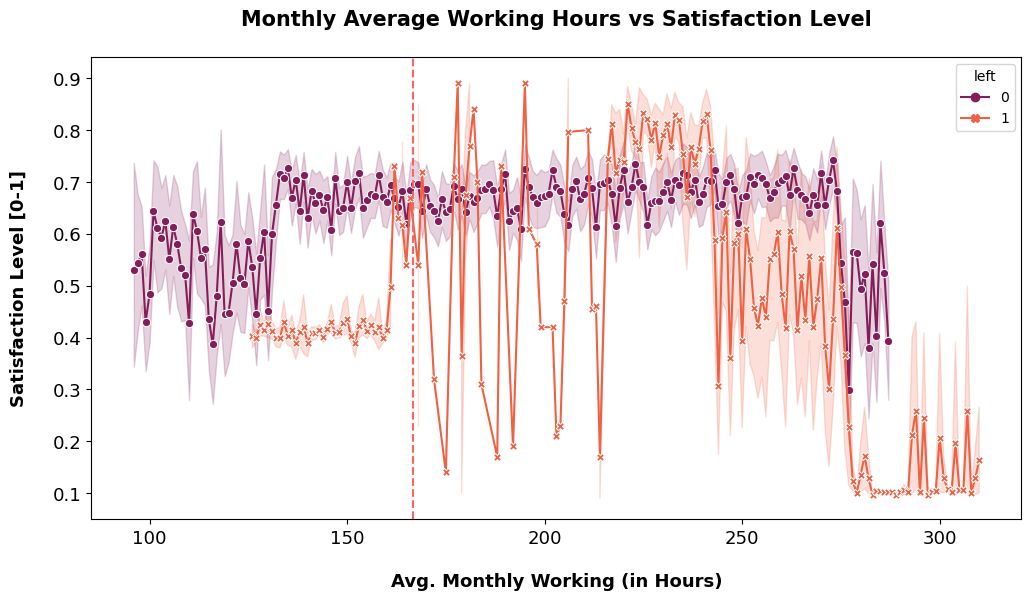

In [28]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_1, x = 'average_monthly_hours', y = 'satisfaction_level', 
             hue = 'left', style = 'left', palette = 'rocket', 
             markers = True, dashes = False)

plt.title('Monthly Average Working Hours vs Satisfaction Level', 
          fontsize = 15, fontweight = 'bold', pad = 23)
plt.xlabel('Avg. Monthly Working (in Hours)', 
           fontsize = 13, fontweight = 'bold', labelpad = 18)
plt.ylabel('Satisfaction Level [0-1]', 
           fontsize = 13, fontweight = 'bold', labelpad = 18)
plt.xticks(rotation = 0, size = 13)
plt.yticks(rotation = 0, size = 13)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67 h/mon', ls = '--')
plt.savefig("Monthly-Working-Hours-vs-Satisfaction.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

- ***The line graph displays that there was enormous group of employees who worked ~240–315 h/mon.*** 
315 h/mon is over 75 h/week for a whole year. Probably, *this is the reason why their satisfaction levels being close to zero.*

In addition, the graph identifies another group of employee who had more normal working hours, yet their satisfaction was only around 0.4. 
- It’s speculated that they felt pressured to work more hence many of their collegues worked more. *This pressure might have lowered their satisfaction levels.*

In [29]:
# Another important variable for employee to left or stay might be their satisfaction level [0-1]

df_1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


**Remarks:**

1) **The mean and median satisfaction scores of employees who left are lower than those of employees who stayed.**

2) Among employees who stayed, the mean satisfaction score appears to be slightly below the median. This implies that satisfaction levels of this group was skewed to the left.

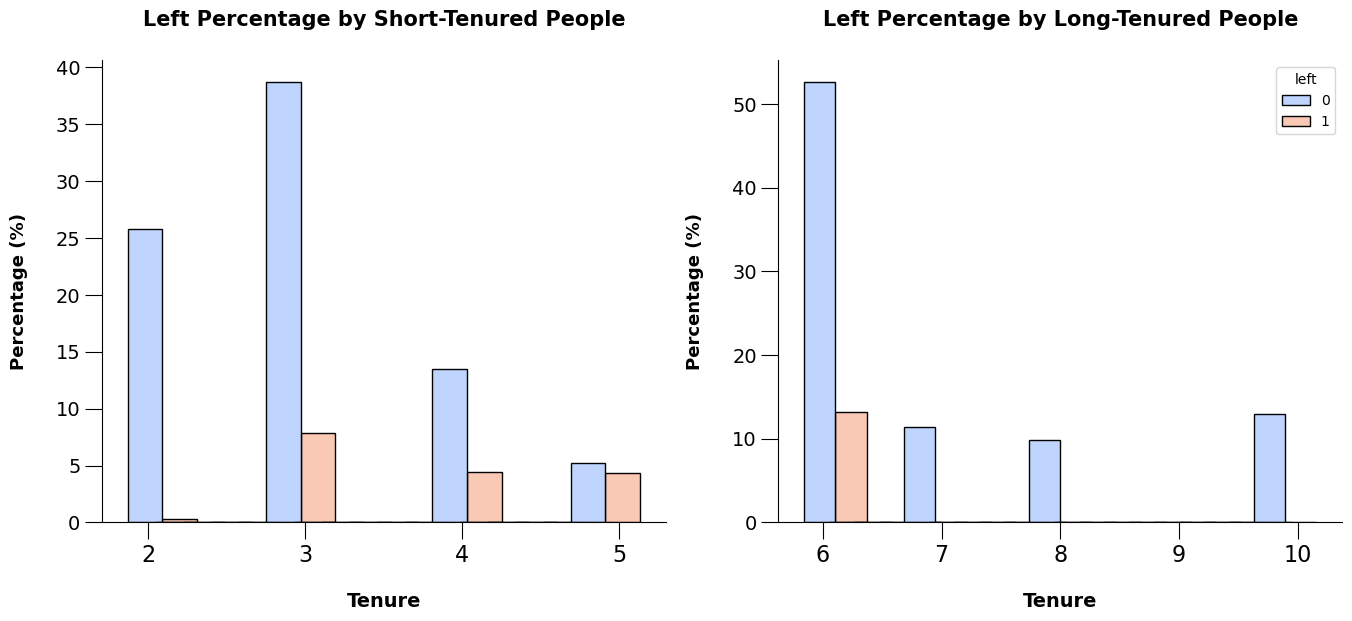

In [30]:
tenure_short = df_1[df_1['tenure'] < 6]
tenure_long = df_1[df_1['tenure'] > 5]


fig, ax = plt.subplots(1, 2, figsize = (16,6))

sns.histplot(data = tenure_short, x = 'tenure', hue = 'left', stat = 'percent',
             multiple = 'dodge', shrink = 2.5, 
             palette = 'coolwarm', legend = False, ax = ax[0])
ax[0].set_title('Left Percentage by Short-Tenured People', fontsize = 15, 
                fontweight = 'bold', pad = 25)
ax[0].set_xlabel('Tenure', fontsize = 14, fontweight = 'bold', labelpad = 18)
ax[0].set_ylabel('Percentage (%)', fontsize = 13, fontweight = 'bold', labelpad = 20)
ax[0].tick_params(axis = 'x',  size = 12, labelsize = 16, rotation = 0)
ax[0].tick_params(axis = 'y',  size = 12, labelsize = 14, rotation = 0)
ax[0].set_xticks(range(2,6))

sns.histplot(data = tenure_long, x = 'tenure', hue = 'left',
             stat = 'percent',
             multiple = 'dodge', shrink = 2.5, 
             palette = 'coolwarm', legend = True, ax = ax[1])
ax[1].set_title('Left Percentage by Long-Tenured People', fontsize = 15, 
                fontweight = 'bold', pad = 25)
ax[1].set_xlabel('Tenure', fontsize = 14, fontweight = 'bold', labelpad = 18)
ax[1].set_ylabel('Percentage (%)', fontsize = 13, fontweight = 'bold', labelpad = 20)
ax[1].tick_params(axis = 'x',  size = 12, labelsize = 16, rotation = 0)
ax[1].tick_params(axis = 'y',  size = 12, labelsize = 14, rotation = 0)

sns.despine()
plt.savefig("Tenure-vs-Left.png", dpi = 300, bbox_inches = 'tight')
plt.show()

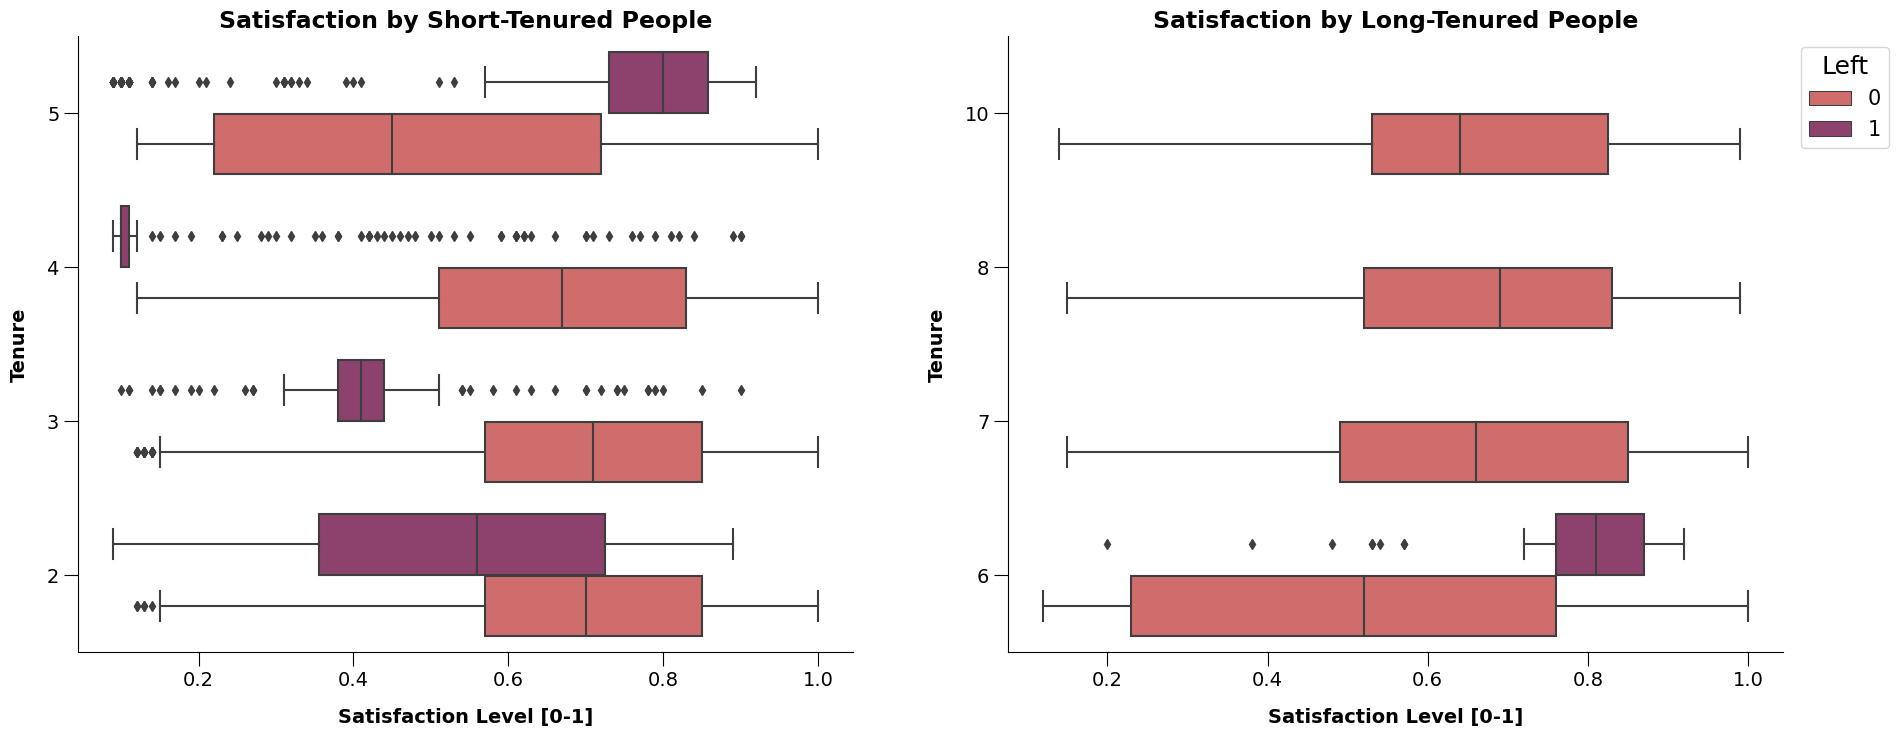

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data = tenure_short, x = 'satisfaction_level', y ='tenure', 
            hue = 'left', orient = "h",
            palette = 'flare', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel('Satisfaction Level [0-1]', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[0].set_ylabel('Tenure', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[0].tick_params(axis = 'x',  size = 10, labelsize = 14)
ax[0].tick_params(axis = 'y',  size = 10, labelsize = 14)
ax[0].set_title('Satisfaction by Short-Tenured People', fontsize='17', fontweight = 'bold')
ax[0].legend('', frameon = False)

sns.boxplot(data = tenure_long, x = 'satisfaction_level', y ='tenure', 
            hue = 'left', orient = "h",
            palette = 'flare', ax = ax[1])
ax[1].invert_yaxis()
ax[1].set_xlabel('Satisfaction Level [0-1]', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[1].set_ylabel('Tenure', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[1].tick_params(axis = 'x',  size = 10, labelsize = 14)
ax[1].tick_params(axis = 'y',  size = 10, labelsize = 14)
ax[1].set_title('Satisfaction by Long-Tenured People', fontsize='17', fontweight = 'bold')
plt.legend(title = 'Left', bbox_to_anchor = (1.15, 1), 
           title_fontsize = '18', fontsize = '15', loc = 'upper right')

sns.despine()
plt.savefig("Satisfaction-by-Tenure.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

Employees who left can be grouped under 2 categories: 
1- Dissatisfied employees w/ shorter tenures
2- Very satisfied employees w/ medium-length tenures. 

**Four-year employees who left have an unusually low satisfaction level.
It’s suggested to investigate changes to company policy that affectes employees at the four-year mark.**

The longest-tenured employees didn’t leave. Also, their satisfaction levels aligned with those of newer employees who stayed. The reason might be that longest-tenured employees highest ranked and paid -- should be investigated.

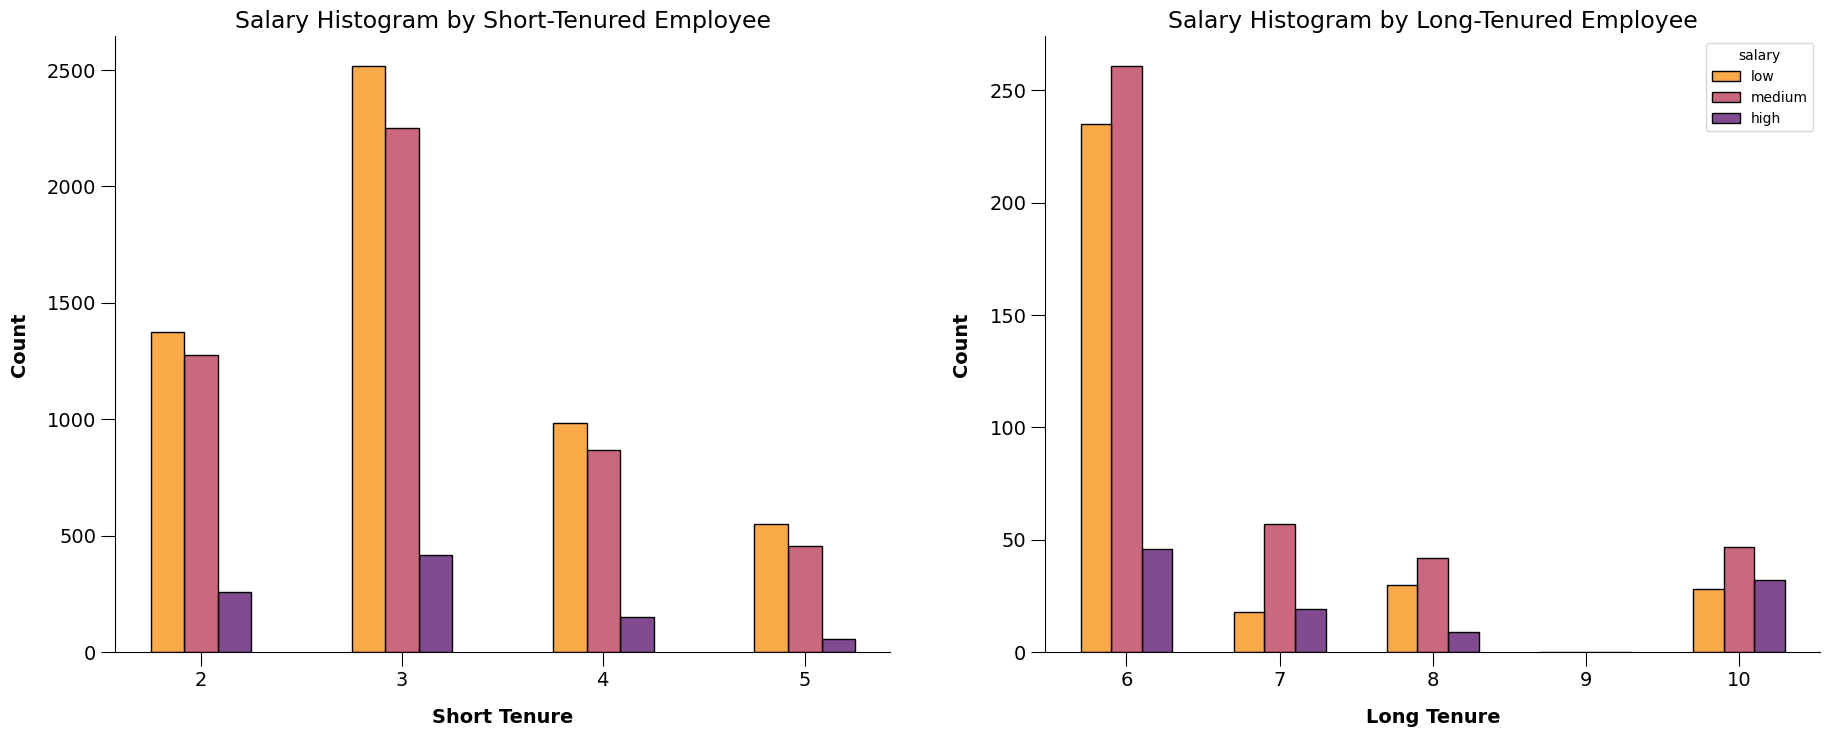

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', discrete = 1,
             hue_order = ['low', 'medium', 'high'], multiple = 'dodge', 
             shrink = .5, palette = 'inferno_r', ax = ax[0])

ax[0].set_title('Salary Histogram by Short-Tenured Employee', fontsize = '17')
ax[0].set_xlabel('Short Tenure', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[0].set_ylabel('Count', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[0].set_xticks(range(2,6))
ax[0].tick_params(axis = 'x',  size = 10, labelsize = 14)
ax[0].tick_params(axis = 'y',  size = 10, labelsize = 14)
ax[0].legend('', frameon = False)


sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', discrete = 1,
             hue_order = ['low', 'medium', 'high'], multiple = 'dodge', 
             shrink = .6, palette = 'inferno_r', ax = ax[1])

ax[1].set_title('Salary Histogram by Long-Tenured Employee', fontsize = '17')
ax[1].set_xlabel('Long Tenure', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[1].set_ylabel('Count', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[1].tick_params(axis = 'x',  size = 10, labelsize = 14)
ax[1].tick_params(axis = 'y',  size = 10, labelsize = 14)


sns.despine()
plt.savefig("Salary-Distribution-based-on-Tenure.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**
*The long-tenured employees were not proportionately comprised of higher-paid employees.*

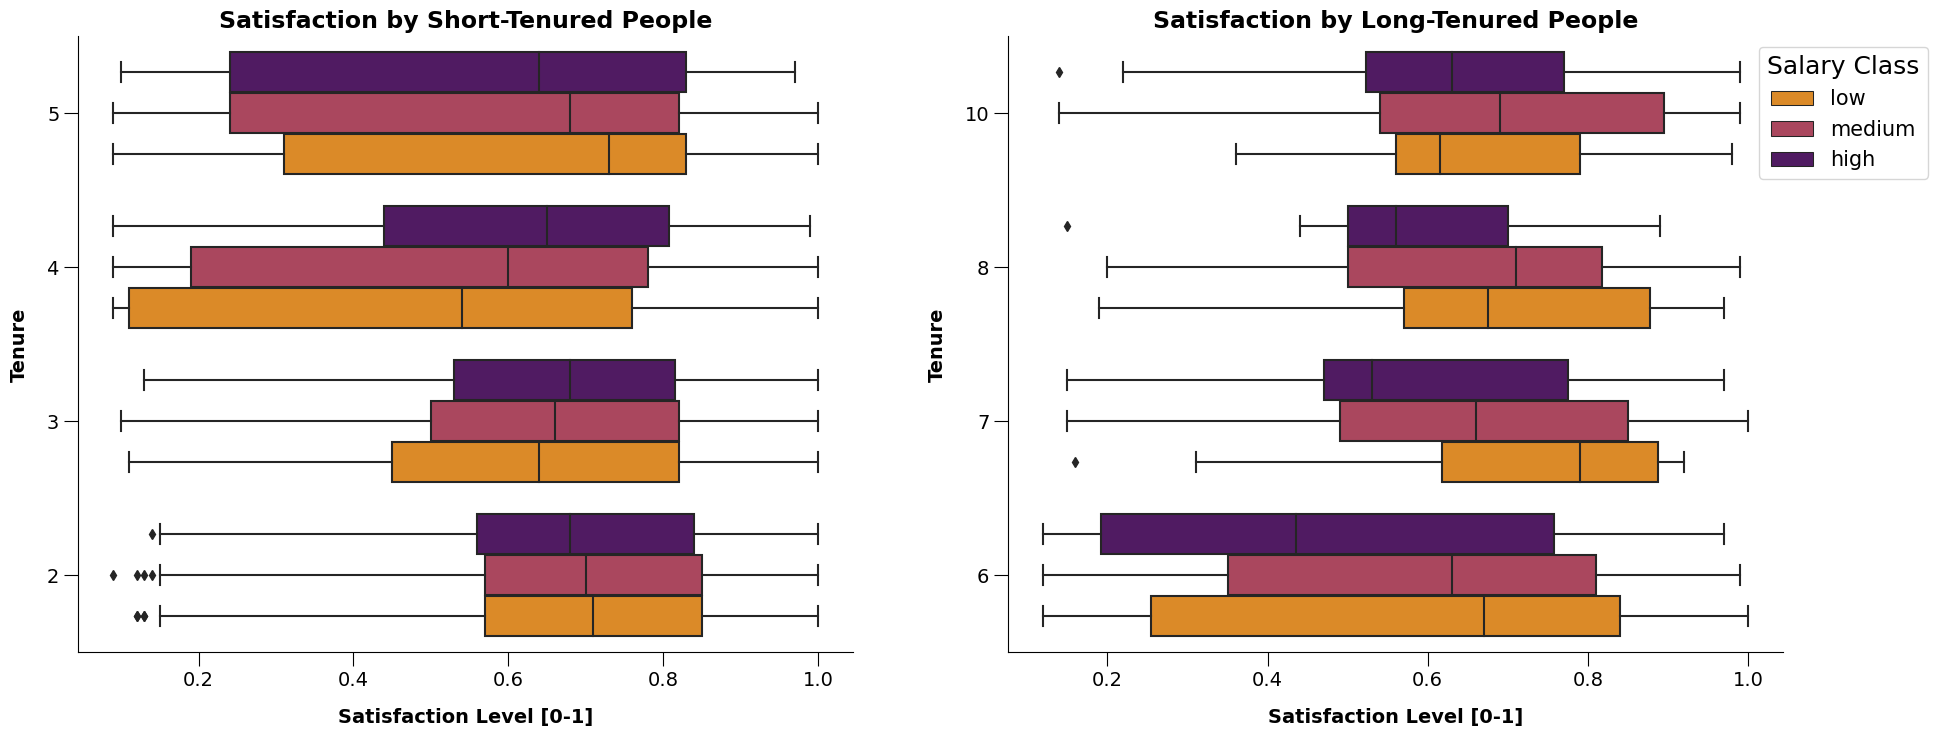

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data = tenure_short, x = 'satisfaction_level', y ='tenure', 
            hue = 'salary', hue_order = ['low', 'medium', 'high'], orient = "h",
            palette = 'inferno_r', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel('Satisfaction Level [0-1]', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[0].set_ylabel('Tenure', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[0].tick_params(axis = 'x',  size = 10, labelsize = 14)
ax[0].tick_params(axis = 'y',  size = 10, labelsize = 14)
ax[0].set_title('Satisfaction by Short-Tenured People', fontsize = '17', fontweight = 'bold')
ax[0].legend('', frameon = False)

sns.boxplot(data = tenure_long, x = 'satisfaction_level', y ='tenure', 
            hue = 'salary', hue_order = ['low', 'medium', 'high'], orient = "h",
            palette = 'inferno_r', ax = ax[1])
ax[1].invert_yaxis()
ax[1].set_xlabel('Satisfaction Level [0-1]', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[1].set_ylabel('Tenure', fontsize = 14, fontweight = 'bold', labelpad = 13)
ax[1].tick_params(axis = 'x',  size = 10, labelsize = 14)
ax[1].tick_params(axis = 'y',  size = 10, labelsize = 14)

ax[1].set_title('Satisfaction by Long-Tenured People', fontsize = '17', fontweight = 'bold')
plt.legend(title = 'Salary Class', bbox_to_anchor = (1.2, 1), 
           title_fontsize = '18', fontsize = '15',loc = 'upper right')

sns.despine()
plt.savefig("Satisfaction-Levels-across-Tenure-Groups.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

Employees with 4 years of tenure satisfaction level seem to be correlated with salary. Employees earning high salary had higher satisfaction level.
Interestingly, 7 and 8 year tenured employees with low salary had high satisfaction level (more than their high salary earning peers). 
*This implies that long-tenured employee satisfaction might be weakly correlated to salary.*

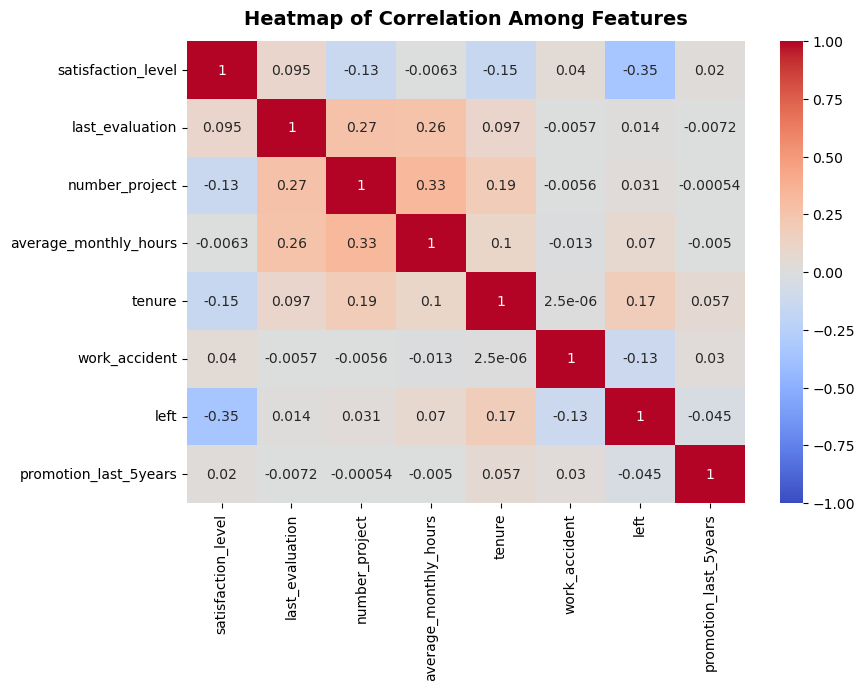

In [34]:
plt.figure(figsize=(9, 6))
heatmap = sns.heatmap(df_1.corr(numeric_only = True), vmin = -1, vmax = 1, annot = True, 
                      cmap = sns.color_palette('coolwarm', as_cmap = True))
heatmap.set_title('Heatmap of Correlation Among Features', 
                  fontdict = {'fontweight':'bold','fontsize':14}, pad = 12)

plt.savefig("Correlation-Heatmap.png", dpi = 300, bbox_inches = 'tight')
plt.show()

### Insights

**Leaving is linked to longer working hours, contributing to many projects, and lower satisfaction levels.** 

- In addition, working long hours and not receive promotions or good evaluation scores might chasing employees away. 
- There’s noticeable group of employees at this company who are probably burned out. 

- *In addition, if an employee has spent more than six years at the company, they stay.*

**All in all, it seems that employees are leaving the company as a result of poor management.**

# Construct Stage

### Identifying the prediction type

Modeling purpose is predicting whether an employee leaves the company (categorical outcome variable). 
The outcome variable can be either 1 (employee left) or 0 (employee stayed).

*Therefore, it is binary classification task.* 

### Determining suitable model types for binary classification task

Since the outcome variable is categorical and task is binary classification, appropriate models are *Logistic Regression or Tree-based Machine Learning model*.

Eventhough, it can be proceeded with one of the models, this project will implement both and compare to select champion model.

### Modeling Approach A: Binomial Logistic Regression Model

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

In [35]:
# There are two non-numeric variables: department and salary. 
# Hence 'department' is categorical variable, it can be dummied.
# 'salary' is categorical and ordinal. Thus, it will converted to numbers to represent hierarchy among categories.

df_encoded = df_1.copy()
df_encoded['salary'] = df_encoded['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [36]:
df_encoded = pd.get_dummies(df_encoded, drop_first = False, dtype = int)
df_encoded

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


In [37]:
# Hence logistic regression is quite sensitive to outliers, outliers should be removed in 'tenure'!

df_logreg = df_encoded[(df_encoded['tenure'] >= lower_threshold) & (df_encoded['tenure'] <= upper_threshold)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
# Isolating the outcome variable

y = df_logreg['left']

X = df_logreg.copy()
X = X.drop('left', axis = 1).reset_index(drop = True)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# Splitting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [40]:
# Constructing logistic regression model and fit it to the training set

log_clf = LogisticRegression(random_state = 42, max_iter = 550).fit(X_train, y_train)

In [41]:
y_preds = log_clf.predict(X_test)

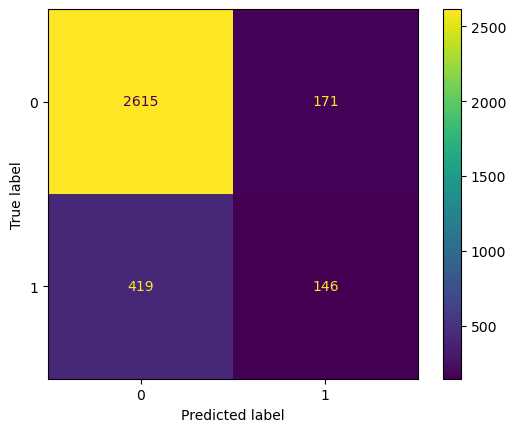

In [42]:
# Creating confusion matrix to visualize the results of the logistic regression model

log_cm = metrics.confusion_matrix(y_test, y_preds, labels = log_clf.classes_)
log_cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)
log_cm_disp.plot(values_format = '')

plt.savefig("Confusion-Matrix-Logistic-Regression.png", dpi = 300, bbox_inches = 'tight')
plt.show()

The upper-left quadrant displays the number of true negatives. 
The upper-right quadrant displays the number of false positives. 
The bottom-left quadrant displays the number of false negatives. 
The bottom-right quadrant displays the number of true positives.

- True negatives: The number of people who did not leave that the model accurately predicted did not leave.

- False positives: The number of people who did not leave the model inaccurately predicted as leaving.

- False negatives: The number of people who left that the model inaccurately predicted did not leave. 

- True positives: The number of people who left the model accurately predicted as leaving.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.
Nonethless, the logistic regrssion model (check above) is not succesfull at predicting who will left the company.
On the other hand, **it performed well at predicting the employees who will stay.**
- *This difference between prediction performance may be derived from class imbalance in the dataset.*

In [43]:
# Checking the class imbalance in the data

df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

The outcome variable has 83%-17% split. *The data is not perfectly balanced, but it is not extremely imbalanced.* 
Therefore, resampling of the data is not necessity.

In [44]:
# Create classification report for logistic regression model

target_labels = ['Predicted would stay', 'Predicted would leave']
print(metrics.classification_report(y_test, y_preds, target_names = target_labels))

                       precision    recall  f1-score   support

 Predicted would stay       0.86      0.94      0.90      2786
Predicted would leave       0.46      0.26      0.33       565

             accuracy                           0.82      3351
            macro avg       0.66      0.60      0.61      3351
         weighted avg       0.79      0.82      0.80      3351



As confusion matrix (see above) indicated, **the logistic regression model performs well at prediting who would stay.**

Nonethless, *it performed poorer when predicting who would left company, its recall score is drastically low.*
***If predicting employees who leave is important for policy makers, then the the model is unsatisfactory since scores are significantly low.***

**In general, the model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%.**

### Modeling Approach B: Tree-based Model

In [45]:
y = df_encoded['left']
X = df_encoded.drop('left', axis = 1).reset_index(drop = True)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
X.shape, y.shape

((11991, 18), (11991,))

In [47]:
# Splitting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8393, 18), (3598, 18), (8393,), (3598,))

In [49]:
# Assigning dictionary of parameters and scoring metrics
cv_params = {'max_depth':[4, 6, 8, None], 
             'min_samples_leaf': [1, 2, 5], 
             'min_samples_split': [2, 4, 8]}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [50]:
# Instantiating model
dt = DecisionTreeClassifier(random_state = 42)

In [51]:
# Instantiate GridSearch
dt_cv = GridSearchCV(dt, cv_params, scoring = scoring, cv = 6, refit = 'f1')

In [52]:
# Fitting the model
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 8]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [53]:
dt_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8}

In [54]:
dt_cv.best_score_

0.9450932751462169

**Remarks:**

    F1 = 2 * (precision * recall) / (precision + recall)

- **This is a strong F1 score. Therefore, the decision tree model can predict employees who will stay and leave very well.**

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

In [55]:
# Function to extract all defined scores yielded from grid search

def make_results(model_name:str, model_object, metric:str):
    metrics_dict =  {'auc': 'mean_test_roc_auc', 
                'precision': 'mean_test_precision',
                'recall': 'mean_test_recall',
                'f1': 'mean_test_f1',
                'accuracy': 'mean_test_accuracy'}
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metrics_dict[metric]].idxmax(), :]
    
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
   

    table = pd.DataFrame()
    
    table = pd.DataFrame({'Model': [model_name], 
                          'Precision': [precision], 
                          'Recall': [recall], 
                          'F1': [f1], 
                          'Accuracy': [accuracy], 
                          'AUC': [auc]})
    
    return table

In [56]:
dt_cv_results = make_results('Decision Tree CV', dt_cv, 'f1')
dt_cv_results

,Model,Precision,Recall,F1,Accuracy,AUC
0,Decision Tree CV,0.977189,0.915362,0.945093,0.982367,0.967358


**Remarks:**

**Score table (above) displays strong indicators that builded decision tree model performs really good.**

- *Neverthless, decision tree modelling is prone to overfitting.*

- *In contrast, random forest model avoids overfitting by incorporating multiple trees to make predictions.*

Thus, random forest would be much ideal model in this case.

### Building Random Forest Model

In [57]:
rf = RandomForestClassifier(random_state = 42)


cv_params_rf = {'max_depth': [3,5,9], 
             'max_features': [1.0],
             'max_samples': [0.8, 1.0],
             'min_samples_leaf': [2,3],
             'min_samples_split': [8, 10],
             'n_estimators': [200, 350, 400]}


scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf = GridSearchCV(rf, cv_params_rf, scoring = scoring, cv = 5, refit = 'f1')

In [58]:
%time

rf.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 9], 'max_features': [1.0],
                         'max_samples': [0.8, 1.0], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [8, 10],
                         'n_estimators': [200, 350, 400]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [59]:
# Defining path to the folder where the model will be saved
path = '/Users/sevilaymuniregirgin/Downloads'

In [60]:
# Function to pickle the model

def write_pickle(path, model_object, save_as:str):
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [61]:
# Function to read pickled model

def read_pickle(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read: 
        model = pickle.load(to_read)
    return model

In [62]:
# Writing the pickle
write_pickle(path, rf, 'hr_rf')

In [63]:
# Reading saved pickle
rf = read_pickle(path, 'hr_rf')

In [64]:
rf.best_score_

0.9472069112571061

In [65]:
rf.best_params_

{'max_depth': 9,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 350}

In [66]:
rf_cv_results = make_results('Random Forest CV', rf, 'f1')
print(dt_cv_results)
print('')
print(rf_cv_results)

              Model  Precision    Recall        F1  Accuracy       AUC
0  Decision Tree CV   0.977189  0.915362  0.945093  0.982367  0.967358

              Model  Precision    Recall        F1  Accuracy       AUC
0  Random Forest CV   0.983035  0.913911  0.947207  0.983081  0.980377


**Remarks:**

All in all, the evaluation scores of the random forest model are better than those of the decision tree model. Also, random forest approach is resistant to overfitting which **rendering this model as champion in this comparison**.

### **!!!** 
Before continuing w/ test data, 2nd round of model building will be performed hence high evaluation scores can be suspicious. 

- It is possible that data leakage occurs. *Training a model w/ leaked data can yield unrealistic score that cannot be replicated in production.*

- The 'average_monthly_hours' column can be source of some data leakage. If employees have already decided to leave, or have been identified as employee to be fired, they might be working fewer hours.

***2nd round of model building will drop 'average_monthly_hours' and incorporate novel feature to build improved models. This novel feature is 'overworked' - a binary variable.***

### Feature Engineering 

In [67]:
df_2 = df_encoded.copy()
df_2['overworked'] = df_2['average_monthly_hours']
print('Max. hours:', df_2['overworked'].max())
print('')
print('Min. hours:', df_2['overworked'].min())

Max. hours: 310

Min. hours: 96


In [68]:
# Defining 'overworked' as working > 167 h/month since avg. monthly working hours

df_2['overworked'] = (df_2['overworked'] > 167).astype(int)
df_2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [69]:
df_2 = df_2.drop('average_monthly_hours', axis = 1).reset_index(drop = True)
df_2.head()

,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
y = df_2['left']
X = df_2.drop('left', axis = 1)

In [71]:
X.shape, y.shape

((11991, 18), (11991,))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8393, 18), (3598, 18), (8393,), (3598,))

In [74]:
# Assigning dictionary of parameters and scoring metrics
cv_params = {'max_depth':[4, 6, 8, None], 
             'min_samples_leaf': [1, 2, 5], 
             'min_samples_split': [2, 4, 8]}
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

dt_2 = DecisionTreeClassifier(random_state = 42)
dt_2_cv = GridSearchCV(dt_2, cv_params, scoring = scoring, cv = 6, refit = 'f1')

In [75]:
dt_2_cv.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 8]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [76]:
dt_2_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}

In [77]:
dt_2_cv.best_score_

0.9337009304773183

**This model performs very well, even without detailed hours worked data.**

In [78]:
dt_2_cv_results = make_results('2nd Decision Tree CV', dt_2_cv, 'f1')
print(dt_cv_results)
print('')
print(dt_2_cv_results)

              Model  Precision    Recall        F1  Accuracy       AUC
0  Decision Tree CV   0.977189  0.915362  0.945093  0.982367  0.967358

                  Model  Precision    Recall        F1  Accuracy       AUC
0  2nd Decision Tree CV   0.959211  0.909625  0.933701  0.978554  0.959081


**Remarks:**
1) Some of the other scores fell. That’s to be expected given fewer features were taken into account in this round of the model. 
2) Still, the scores are very good.

In [79]:
rf_2 = RandomForestClassifier(random_state = 42)


cv_params_rf = {'max_depth': [3,5,9], 
             'max_features': [1.0],
             'max_samples': [0.8, 1.0],
             'min_samples_leaf': [2,3],
             'min_samples_split': [8, 10],
             'n_estimators': [200, 350, 400]}


scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf_2_cv = GridSearchCV(rf_2, cv_params_rf, scoring = scoring, cv = 5, refit = 'f1')

In [80]:
%time
rf_2_cv.fit(X_train, y_train)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 7.87 µs


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 9], 'max_features': [1.0],
                         'max_samples': [0.8, 1.0], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [8, 10],
                         'n_estimators': [200, 350, 400]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [81]:
write_pickle(path, rf_2_cv, 'hr_rf_2')

In [82]:
rf_2_cv = read_pickle(path, 'hr_rf_2')

In [83]:
rf_2_cv.best_params_

{'max_depth': 9,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 200}

In [84]:
rf_2_cv.best_score_

0.9416523816419626

In [85]:
rf_2_cv_results = make_results('2nd Random Forest CV', rf_2_cv, 'f1')
print(dt_cv_results)
print('')
print(rf_cv_results)
print('')
print(dt_2_cv_results)
print('')
print(rf_2_cv_results)

              Model  Precision    Recall        F1  Accuracy       AUC
0  Decision Tree CV   0.977189  0.915362  0.945093  0.982367  0.967358

              Model  Precision    Recall        F1  Accuracy       AUC
0  Random Forest CV   0.983035  0.913911  0.947207  0.983081  0.980377

                  Model  Precision    Recall        F1  Accuracy       AUC
0  2nd Decision Tree CV   0.959211  0.909625  0.933701  0.978554  0.959081

                  Model  Precision    Recall        F1  Accuracy       AUC
0  2nd Random Forest CV   0.976893  0.908888  0.941652  0.981294  0.977303


### *2nd Random Forest model is the Champion Model* **!**

In [86]:
y_preds = rf_2_cv.predict(X_test)

In [87]:
precision_test = metrics.precision_score(y_test, y_preds)
recall_test = metrics.recall_score(y_test, y_preds) 
f1_test = metrics.f1_score(y_test, y_preds)
accuracy_test = metrics.accuracy_score(y_test, y_preds)
roc_auc_test = metrics.roc_auc_score(y_test, y_preds)

print('The precision score is {pt:.4f}'.format(pt = precision_test))
print('The recall score is {rt:.4f}'.format(rt = recall_test))
print('The accuracy score is {at:.4f}'.format(at = accuracy_test))
print('The F1 score is {ft:.4f}'.format(ft = f1_test))
print('The AUC score is {auc:.4f}'.format(auc = roc_auc_test))

The precision score is 0.9770
The recall score is 0.9246
The accuracy score is 0.9839
The F1 score is 0.9501
The AUC score is 0.9601


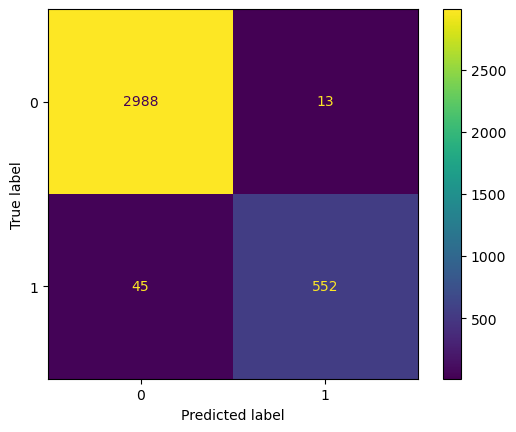

In [88]:
# Creating for confusion matrix champion model

rf_2_cm = metrics.confusion_matrix(y_test, y_preds)
rf_2_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_2_cm)
rf_2_disp.plot(values_format = '')

plt.savefig("Confusion-Matrix-Random-Forest-ChampionModel.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

The model predicts more false negatives than false positives, ***the model might predict that employee will stay when the case actually is opposite.***

Nonethless, **its scores and confusion matrix established that this model is strong.**

### Decision Tree Splits

In [89]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'tenure',
       'work_accident', 'promotion_last_5years', 'salary', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'overworked'],
      dtype='object')

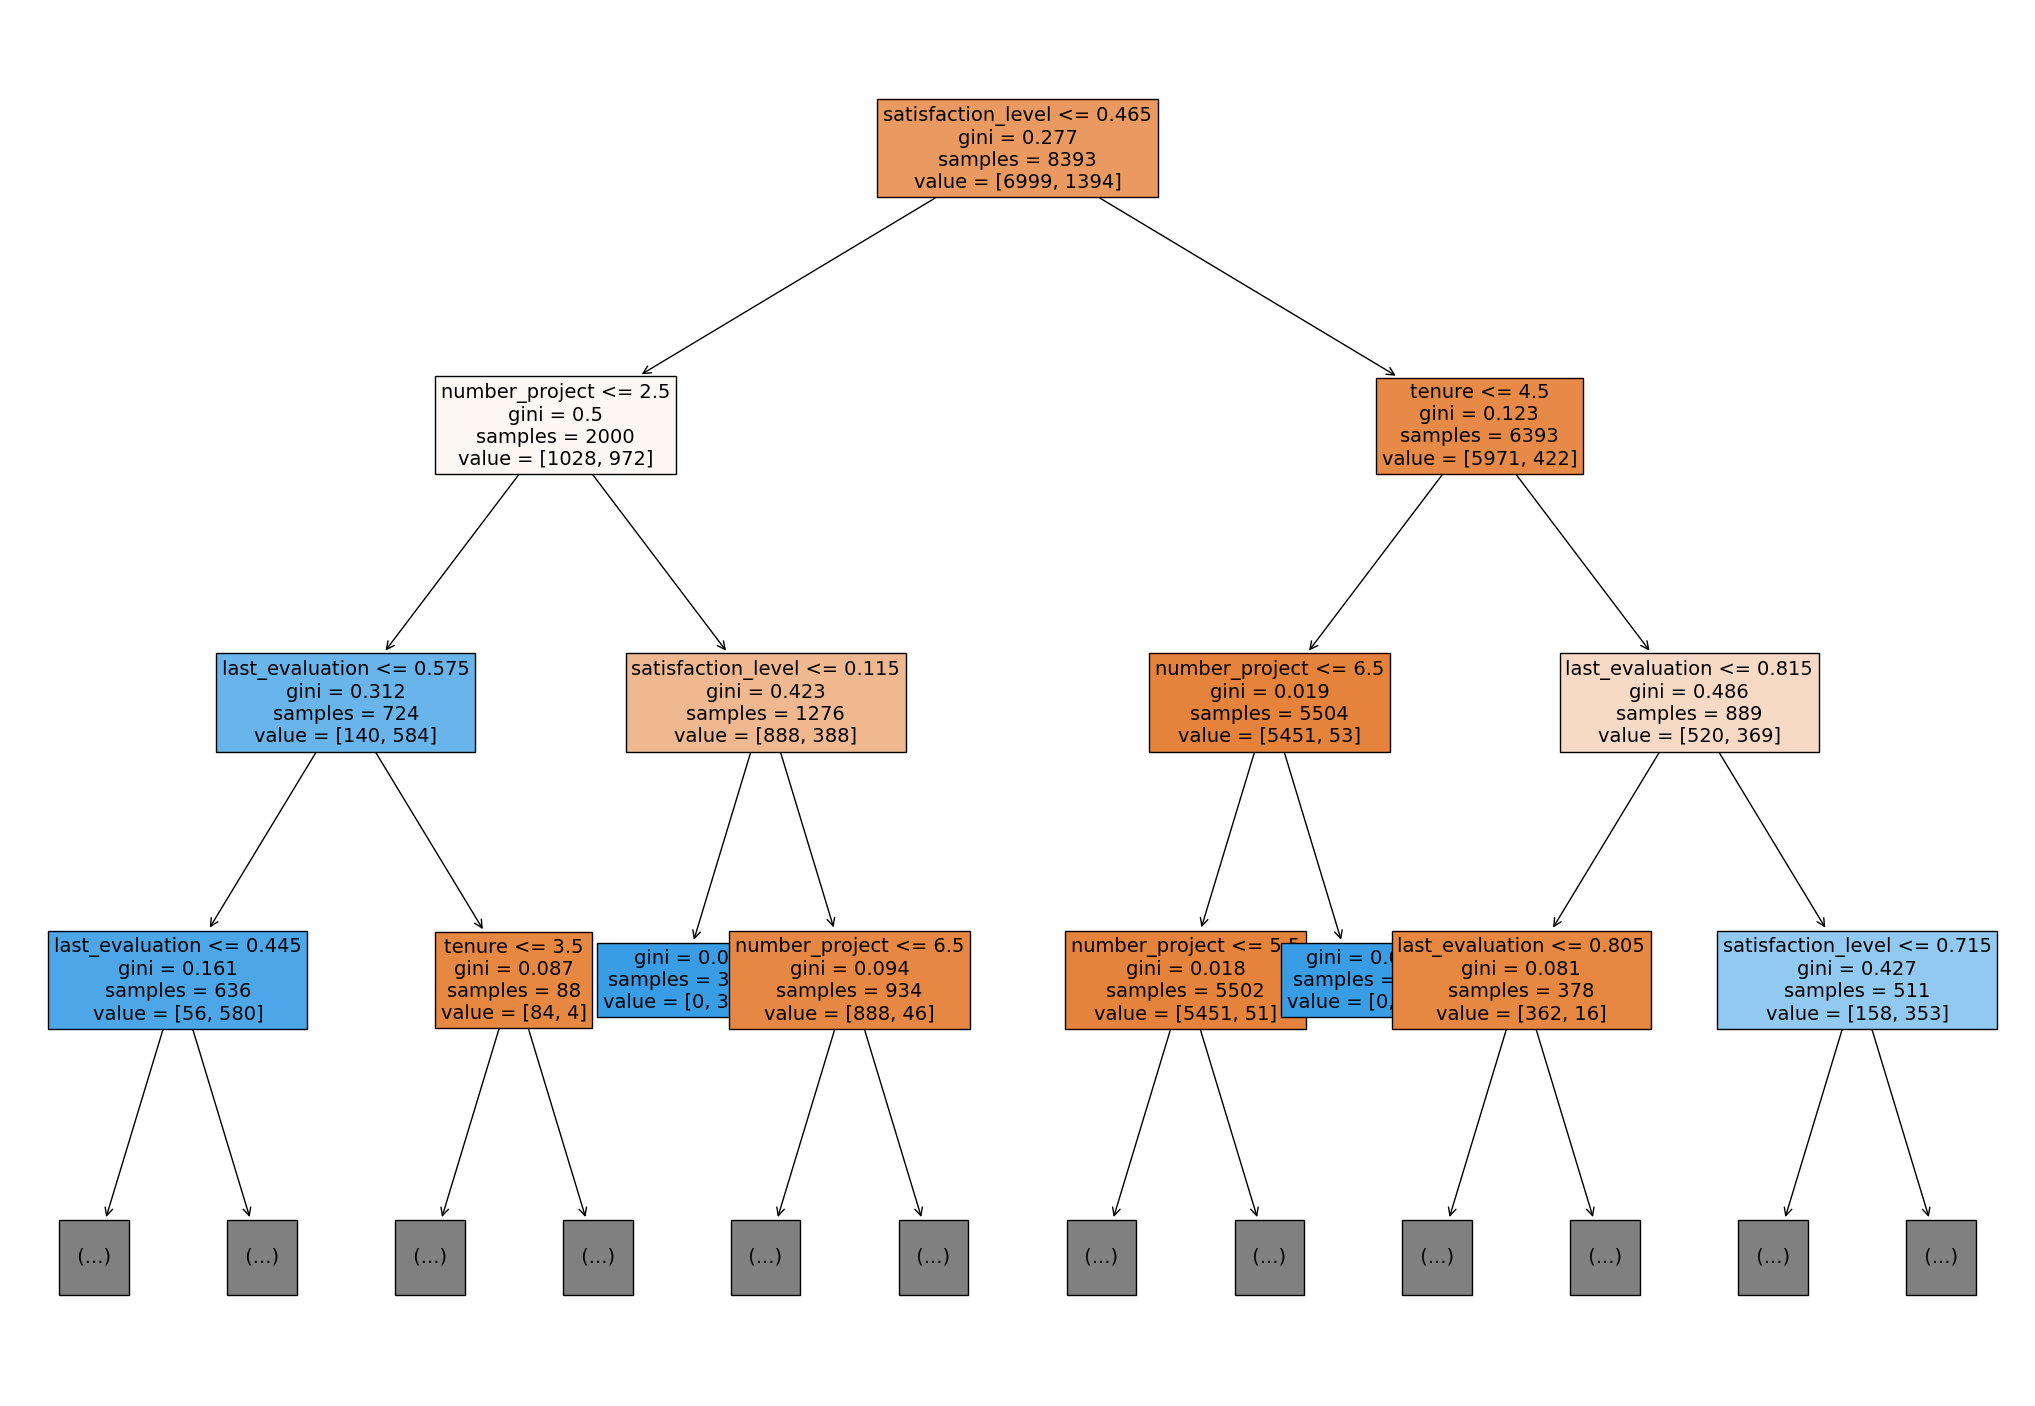

In [90]:
plt.figure(figsize=(26, 18))

plot_tree(dt_2_cv.best_estimator_, max_depth = 3, fontsize = 14, 
          feature_names = ['satisfaction_level', 'last_evaluation', 
                           'number_project', 'tenure',
                           'work_accident', 'promotion_last_5years', 
                           'salary', 'department_IT', 
                           'department_RandD', 'department_accounting', 
                           'department_hr', 'department_management', 
                           'department_marketing', 'department_product_mng', 
                           'department_sales', 'department_support', 
                           'department_technical', 'overworked'], filled = True)


plt.savefig("Random-Forest-Tree-Split-Plot.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

- Root node is splitted based on 'satisfaction_level' feature. 
- For 2nd node split, criteria features are 'last_evaluation', 'number_project', and 'satisfaction_level'. 

In [91]:
dt_2_importances = pd.DataFrame(dt_2_cv.best_estimator_.feature_importances_, 
                                columns = ['gini_importance'], index = X.columns)
dt_2_importances = dt_2_importances.sort_values(by = 'gini_importance', ascending = False)

dt_2_importances = dt_2_importances[dt_2_importances['gini_importance'] != 0]
dt_2_importances

,gini_importance
satisfaction_level,0.539708
last_evaluation,0.172069
number_project,0.136272
tenure,0.134438
overworked,0.013765
salary,0.001211
department_marketing,0.001152
department_technical,0.000743
department_hr,0.000502
department_sales,0.000116


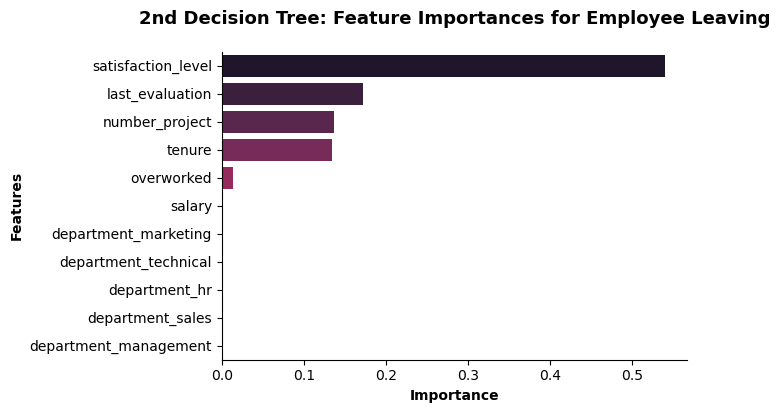

In [92]:
plt.figure(figsize = (6,4))

sns.barplot(data = dt_2_importances, x = 'gini_importance', y = dt_2_importances.index, 
            orient = 'h', palette = 'rocket')
plt.title('2nd Decision Tree: Feature Importances for Employee Leaving', 
          fontsize = 13, fontweight = 'bold', pad = 20)
plt.ylabel('Features', fontweight = 'bold')
plt.xlabel('Importance', fontweight = 'bold')

sns.despine()
plt.savefig("Feature-Importances-Decision-Tree.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

For 2nd **decision tree**, features w/ highest importances (in descending order):
- satisfaction_level
- last_evaluation
- number_project
- tenure
- overworked

These features are most useful in predicting the outcome variable; left. 

### Feature Importances for Random Forest Model

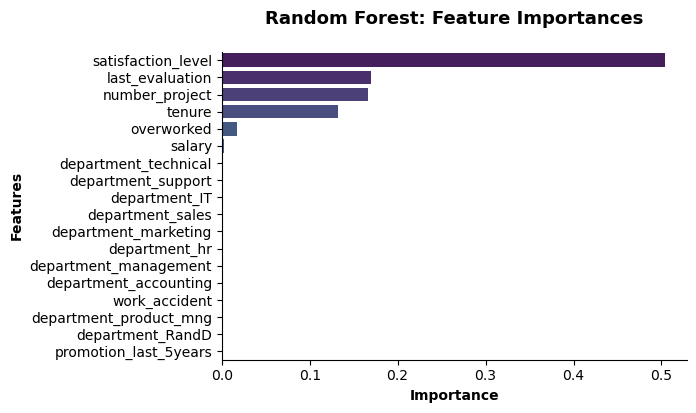

In [95]:
rf_2_cv_importances = rf_2_cv.best_estimator_.feature_importances_
features = X.columns

rf_df = pd.DataFrame({'Feature': features, 'Importance': rf_2_cv_importances})
rf_df = rf_df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (6,4))
sns.barplot(data = rf_df, x = 'Importance', y = 'Feature', 
            orient = 'h', palette = 'viridis')
plt.title('Random Forest: Feature Importances', 
          fontsize = 13, fontweight = 'bold', pad = 20)
plt.ylabel('Features', fontweight = 'bold')
plt.xlabel('Importance', fontweight = 'bold')

sns.despine()
plt.savefig("Feature-Importances-Random-Forest-ChampionModel.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

For 2nd **random forest model**, features w/ highest importances (in descending order):
- satisfaction_level
- last_evaluation
- number_project
- tenure
- overworked

These features are most useful in predicting the outcome variable; left, also in alignment w/ decision tree's feature importances (see above).

# Execute Stage

### Summary of model results

**Logistic Regression**
The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**
After conducting feature engineering, **the decision tree** model achieved following scores on test dataset:
- *AUC of 95.9%*
- *Precision of 95.9%*
- *Recall of 90.9%*
- *F1-score of 93.3%*
- *Accuracy of 97.8%*

After conducting feature engineering, the **random forest** model achieved following scores on test dataset:
- *AUC of 97.7%*
- *Precision of 97.0%*
- *Recall of 90.8%*
- *F1-score of 93.8%*
- *Accuracy of 98.0%*


**The random forest modestly outperformed the decision tree model!!**

### Conclusion and Recommendations

The graphs and models demonstrated that *employees are overworked*.

To prevent employees leave, **recommendations** to the stakeholders are:
- Cap the number of projects that employees contributes
- Consider promoting employees who have been working for at least 4 years
- Conduct further analysis on why four-year tenured employees are so dissatisfied
- Either provide compensation to employees for working longer hours, or don’t require them to do so
- If employees aren’t familiar with the company’s overtime pay policies, inform them about
- High evaluation scores should not be restricted to employees who work 200+ h/month
- Improve performance review process

### Next Steps
For another project, K-means model building on this data and cluster analysis can be performed. This approach may suggest valuable insights.